<a href="https://colab.research.google.com/github/aapte11/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

## Data Wrangling and Exploration

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv'

df = pd.read_csv(url)

# df.head()

df.timestamp = pd.to_datetime(df.timestamp)

df.timestamp.describe()


count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [108]:
df.set_index('timestamp', inplace = True)

df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [109]:
length, width = df.shape

print(df.shape)
print(length*width)

(80053, 26)
2081378


In [110]:
# Use Value Counts rather than Unique

df.category.value_counts()

Males Aged 18-29      4216
US users              4216
Males                 4216
Aged 45+              4216
Top 1000 voters       4216
Non-US users          4216
Females Aged 18-29    4216
Aged 18-29            4216
Aged 30-44            4216
Females               4216
Aged under 18         4216
Males under 18        4216
Females Aged 45+      4216
Females Aged 30-44    4216
Males Aged 45+        4216
IMDb users            4216
IMDb staff            4216
Males Aged 30-44      4216
Females under 18      4165
Name: category, dtype: int64

In [111]:
df.columns

Index(['respondents', 'category', 'link', 'average', 'mean', 'median',
       '1_votes', '2_votes', '3_votes', '4_votes', '5_votes', '6_votes',
       '7_votes', '8_votes', '9_votes', '10_votes', '1_pct', '2_pct', '3_pct',
       '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct', '10_pct'],
      dtype='object')

## Suggested Correct Version of this problem

In [114]:
cols2 = ['1_pct','2_pct', '3_pct', '4_pct', '5_pct', 
         '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

pct_votes = df[cols2].tail(1)

pct_votes



,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [116]:
# Why inplace = True fails is beyond me, better to make a copy

pct_votes_new = pct_votes.reset_index(drop=True)

pct_votes_new

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [117]:
pct_votes_new.rename(columns={"1_pct": "1",
                        "2_pct": "2",
                        "3_pct": "3",
                        "4_pct": "4",
                        "5_pct": "5",
                        "6_pct": "6",
                        "7_pct": "7",
                        "8_pct": "8",
                        "9_pct": "9",
                        "10_pct": "10",},
                        
                            inplace = True)

pct_votes_new = pct_votes_new.T

pct_votes_new

,0
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


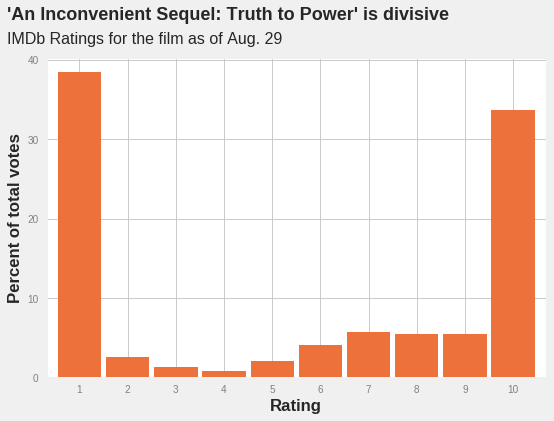

In [200]:
# fig, ax = plt.subplots()


plt.style.use("fivethirtyeight")

# fig = plt.figure();
# fig.patch.set_alpha(0.0)

ax = pct_votes_new.plot.bar(color = '#EC713B', width = 0.9) # All bars are the same color and width

ax.tick_params(labelrotation = 0, colors = 'gray')
y_ticks = [0,10,20,30,40]
ax.set_yticks(y_ticks)
ax.legend().set_visible(False)
ax.set_facecolor("white")

ax.set_ylabel("Percent of total votes", fontweight='bold')
ax.set_xlabel("Rating", fontweight='bold')

ax.text(-1.5,45,s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=18, weight='bold')
ax.text(-1.5,42,s="IMDb Ratings for the film as of Aug. 29", fontsize=16)

# ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive \n IMDb Ratings for the film as of Aug. 29", loc = 'left')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white') 
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.tick_params(axis = 'x', color = 'lightgray')
# ax.tick_params(axis = 'y', color = 'blue')
# ax.yaxis.label.set_color('black')
# ax.xaxis.label.set_color('black')
# ax.patch.set_facecolor('white')


plt.show()

# plt.savefig('538.png', transparent=True)

## Alternate Attempt at this problem

In [0]:
# Slicing out relevant columns

cols = ['1_votes', '2_votes', '3_votes', '4_votes', '5_votes',
       '6_votes', '7_votes', '8_votes', '9_votes', '10_votes']

df_new = df[cols]

sum_votes = pd.Series(df_new.sum())

In [170]:
sum_votes = 100 * sum_votes / sum_votes.sum()

sum_votes.rename(index={"1_votes": "1",
                        "2_votes": "2",
                        "3_votes": "3",
                        "4_votes": "4",
                        "5_votes": "5",
                        "6_votes": "6",
                        "7_votes": "7",
                        "8_votes": "8",
                        "9_votes": "9",
                        "10_votes": "10",}, 
                            inplace = True)

sum_votes

1     39.528683
2      2.866229
3      1.734445
4      0.796181
5      1.933035
6      3.332158
7      4.668537
8      4.450586
9      5.594008
10    35.096138
dtype: float64

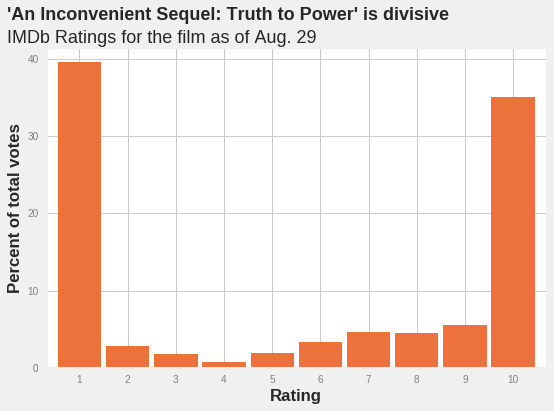

In [191]:
plt.style.use("fivethirtyeight")

ax = sum_votes.plot.bar(color = '#EC713B', width = 0.9)

ax.tick_params(labelrotation = 0, colors = 'gray')
y_ticks = [0,10,20,30,40]
ax.set_yticks(y_ticks)
ax.legend().set_visible(False)
ax.set_facecolor("white")

ax.set_ylabel("Percent of total votes", fontweight='bold')
ax.set_xlabel("Rating", fontweight='bold')

ax.text(-1.5,45,s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=18, weight='bold')
ax.text(-1.5,42,s="IMDb Ratings for the film as of Aug. 29", fontsize=18)

# ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive \n IMDb Ratings for the film as of Aug. 29", loc = 'left')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white') 
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.tick_params(axis = 'x', color = 'lightgray')
# ax.tick_params(axis = 'y', color = 'blue')
# ax.yaxis.label.set_color('black')
# ax.xaxis.label.set_color('black')


plt.show()


## STRETCH GOAL

In [201]:
# Bad Drivers - https://github.com/fivethirtyeight/data/tree/master/bad-drivers

url2 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/bad-drivers/bad-drivers.csv'

driver_df = pd.read_csv(url2)

driver_df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [202]:
driver_df.describe()

,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
count,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000
mean,15.790196,31.725490,30.686275,85.921569,88.72549,886.957647,134.493137
std,4.122002,9.633438,5.132213,15.158949,6.96011,178.296285,24.835922
min,5.900000,13.000000,16.000000,10.000000,76.00000,641.960000,82.750000
25%,12.750000,23.000000,28.000000,83.000000,83.50000,768.430000,114.645000
50%,15.600000,34.000000,30.000000,88.000000,88.00000,858.970000,136.050000
75%,18.500000,38.000000,33.000000,95.000000,95.00000,1007.945000,151.870000
max,23.900000,54.000000,44.000000,100.000000,100.00000,1301.520000,194.780000


In [203]:
driver_df.columns

Index(['State',
       'Number of drivers involved in fatal collisions per billion miles',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted',
       'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents',
       'Car Insurance Premiums ($)',
       'Losses incurred by insurance companies for collisions per insured driver ($)'],
      dtype='object')

In [218]:
driver_df.rename(columns = {'Number of drivers involved in fatal collisions per billion miles' : 'no_fatal',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding' : 'pct_fatal',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired': 'pct_fatal_alcohol',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted': 'pct_fatal_nodistraction',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents' : 'pct_fatal_noprev',
                           'Car Insurance Premiums ($)' : 'ins_premiums',
                           'Losses incurred by insurance companies for collisions per insured driver ($)' : 'ins_losses'}, inplace = True)

driver_df.head()

,no_fatal,pct_fatal,pct_fatal_alcohol,pct_fatal_nodistraction,pct_fatal_noprev,ins_premiums,ins_losses
State,,,,,,,
Alabama,18.8,39,30,96,80,784.55,145.08
Alaska,18.1,41,25,90,94,1053.48,133.93
Arizona,18.6,35,28,84,96,899.47,110.35
Arkansas,22.4,18,26,94,95,827.34,142.39
California,12.0,35,28,91,89,878.41,165.63


In [0]:
# import altair as alt
# from vega_datasets import data

In [221]:
no_fatal = driver_df.no_fatal.sort_values()

no_fatal

State
District of Columbia     5.9
Massachusetts            8.2
Minnesota                9.6
Washington              10.6
Connecticut             10.8
Rhode Island            11.1
New Jersey              11.2
Utah                    11.3
New Hampshire           11.6
California              12.0
New York                12.3
Maryland                12.5
Virginia                12.7
Illinois                12.8
Oregon                  12.8
Vermont                 13.6
Colorado                13.6
Wisconsin               13.8
Michigan                14.1
Ohio                    14.1
Indiana                 14.5
Nevada                  14.7
Nebraska                14.9
Maine                   15.1
Idaho                   15.3
Georgia                 15.6
Iowa                    15.7
Missouri                16.1
Delaware                16.2
North Carolina          16.8
Wyoming                 17.4
Hawaii                  17.5
Mississippi             17.6
Kansas                  17.8
Florida 

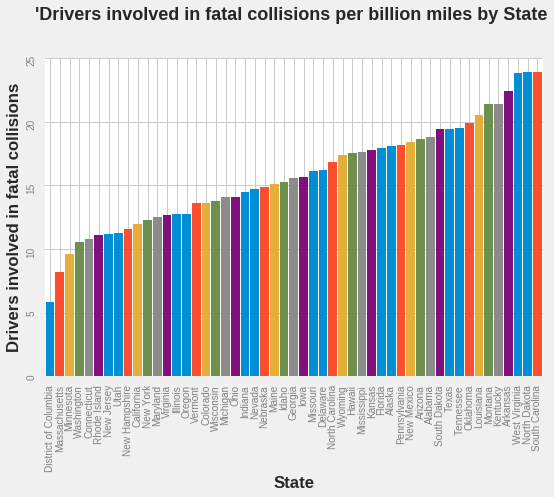

In [231]:
plt.style.use("fivethirtyeight")

# fig = plt.figure();
# fig.patch.set_alpha(0.0)

ax = no_fatal.plot.bar(width = 0.9) # All bars are the same color and width (color = '#EC713B')

ax.tick_params(labelrotation = 90, colors = 'gray')
y_ticks = [0,5,10,15,20,25]
ax.set_yticks(y_ticks)
ax.legend().set_visible(False)
ax.set_facecolor("white")

ax.set_ylabel("Drivers involved in fatal collisions", fontweight='bold')
ax.set_xlabel("State", fontweight='bold')

ax.text(-1.5,28,s="'Drivers involved in fatal collisions per billion miles by State", fontsize=18, weight='bold')


# ax.text(-1.5,42,s="IMDb Ratings for the film as of Aug. 29", fontsize=16)

# ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive \n IMDb Ratings for the film as of Aug. 29", loc = 'left')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white') 
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.tick_params(axis = 'x', color = 'lightgray')
# ax.tick_params(axis = 'y', color = 'blue')
# ax.yaxis.label.set_color('black')
# ax.xaxis.label.set_color('black')
# ax.patch.set_facecolor('white')


plt.show()